In [1]:
library(arrow)
library(cowplot)
library(data.table)
library(dplyr)
library(finalfit)
library(ggplot2)
library(ggridges)
library(ggsci)
library(lubridate)
library(readxl)
library(stringr)
library(tidyverse)
theme_set(theme_bw(base_size = 16))
options(repr.plot.width = 15, repr.plot.height = 15)


Attaching package: ‘arrow’


The following object is masked from ‘package:utils’:

    timestamp



Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘lubridate’


The following objects are masked from ‘package:data.table’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following object is masked from ‘package:cowplot’:

    stamp


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


── Attaching packages ───────────────── tidyverse 1.3.0 ──

✔ tibble  3.1.0     ✔ purrr   0.3.4
✔ tidyr   1.1.3     ✔ forcats 0.5.1
✔ readr   1.4.0     

── Conflicts ──────────────────── tidyverse_conflicts() ──
✖ lubridate::as.difftime() masks base::as.difftime()
✖ d

Tissue,group,Abbrev,Color,Down,Up,Sum,log_value
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Adipose - Subcutaneous,A,ADPSBQ,#FF6600,13,27,40,1.6020600
Adipose - Visceral (Omentum),A,ADPVSC,#FFAA00,10,4,14,1.1461280
Adrenal Gland,A,ADRNLG,#33DD33,13,4,17,1.2304489
Artery - Aorta,A,ARTAORT,#FF5555,18,28,46,1.6627578
Artery - Coronary,A,ARTCRN,#FFAA99,7,22,29,1.4623980
Artery - Tibial,A,ARTTBL,#FF0000,21,45,66,1.8195439
Bladder,A,BLADDER,#A90000,19,19,38,1.5797836
Brain - Amygdala,A,BRNAMY,#EEEE00,17,9,26,1.4149733
Brain - Anterior cingulate cortex (BA24),A,BRNACC,#EEEE00,11,27,38,1.5797836


[1] 52

Warning message:
“Removed 3 rows containing missing values (position_stack).”
Warning message:
“Removed 3 rows containing missing values (geom_text).”


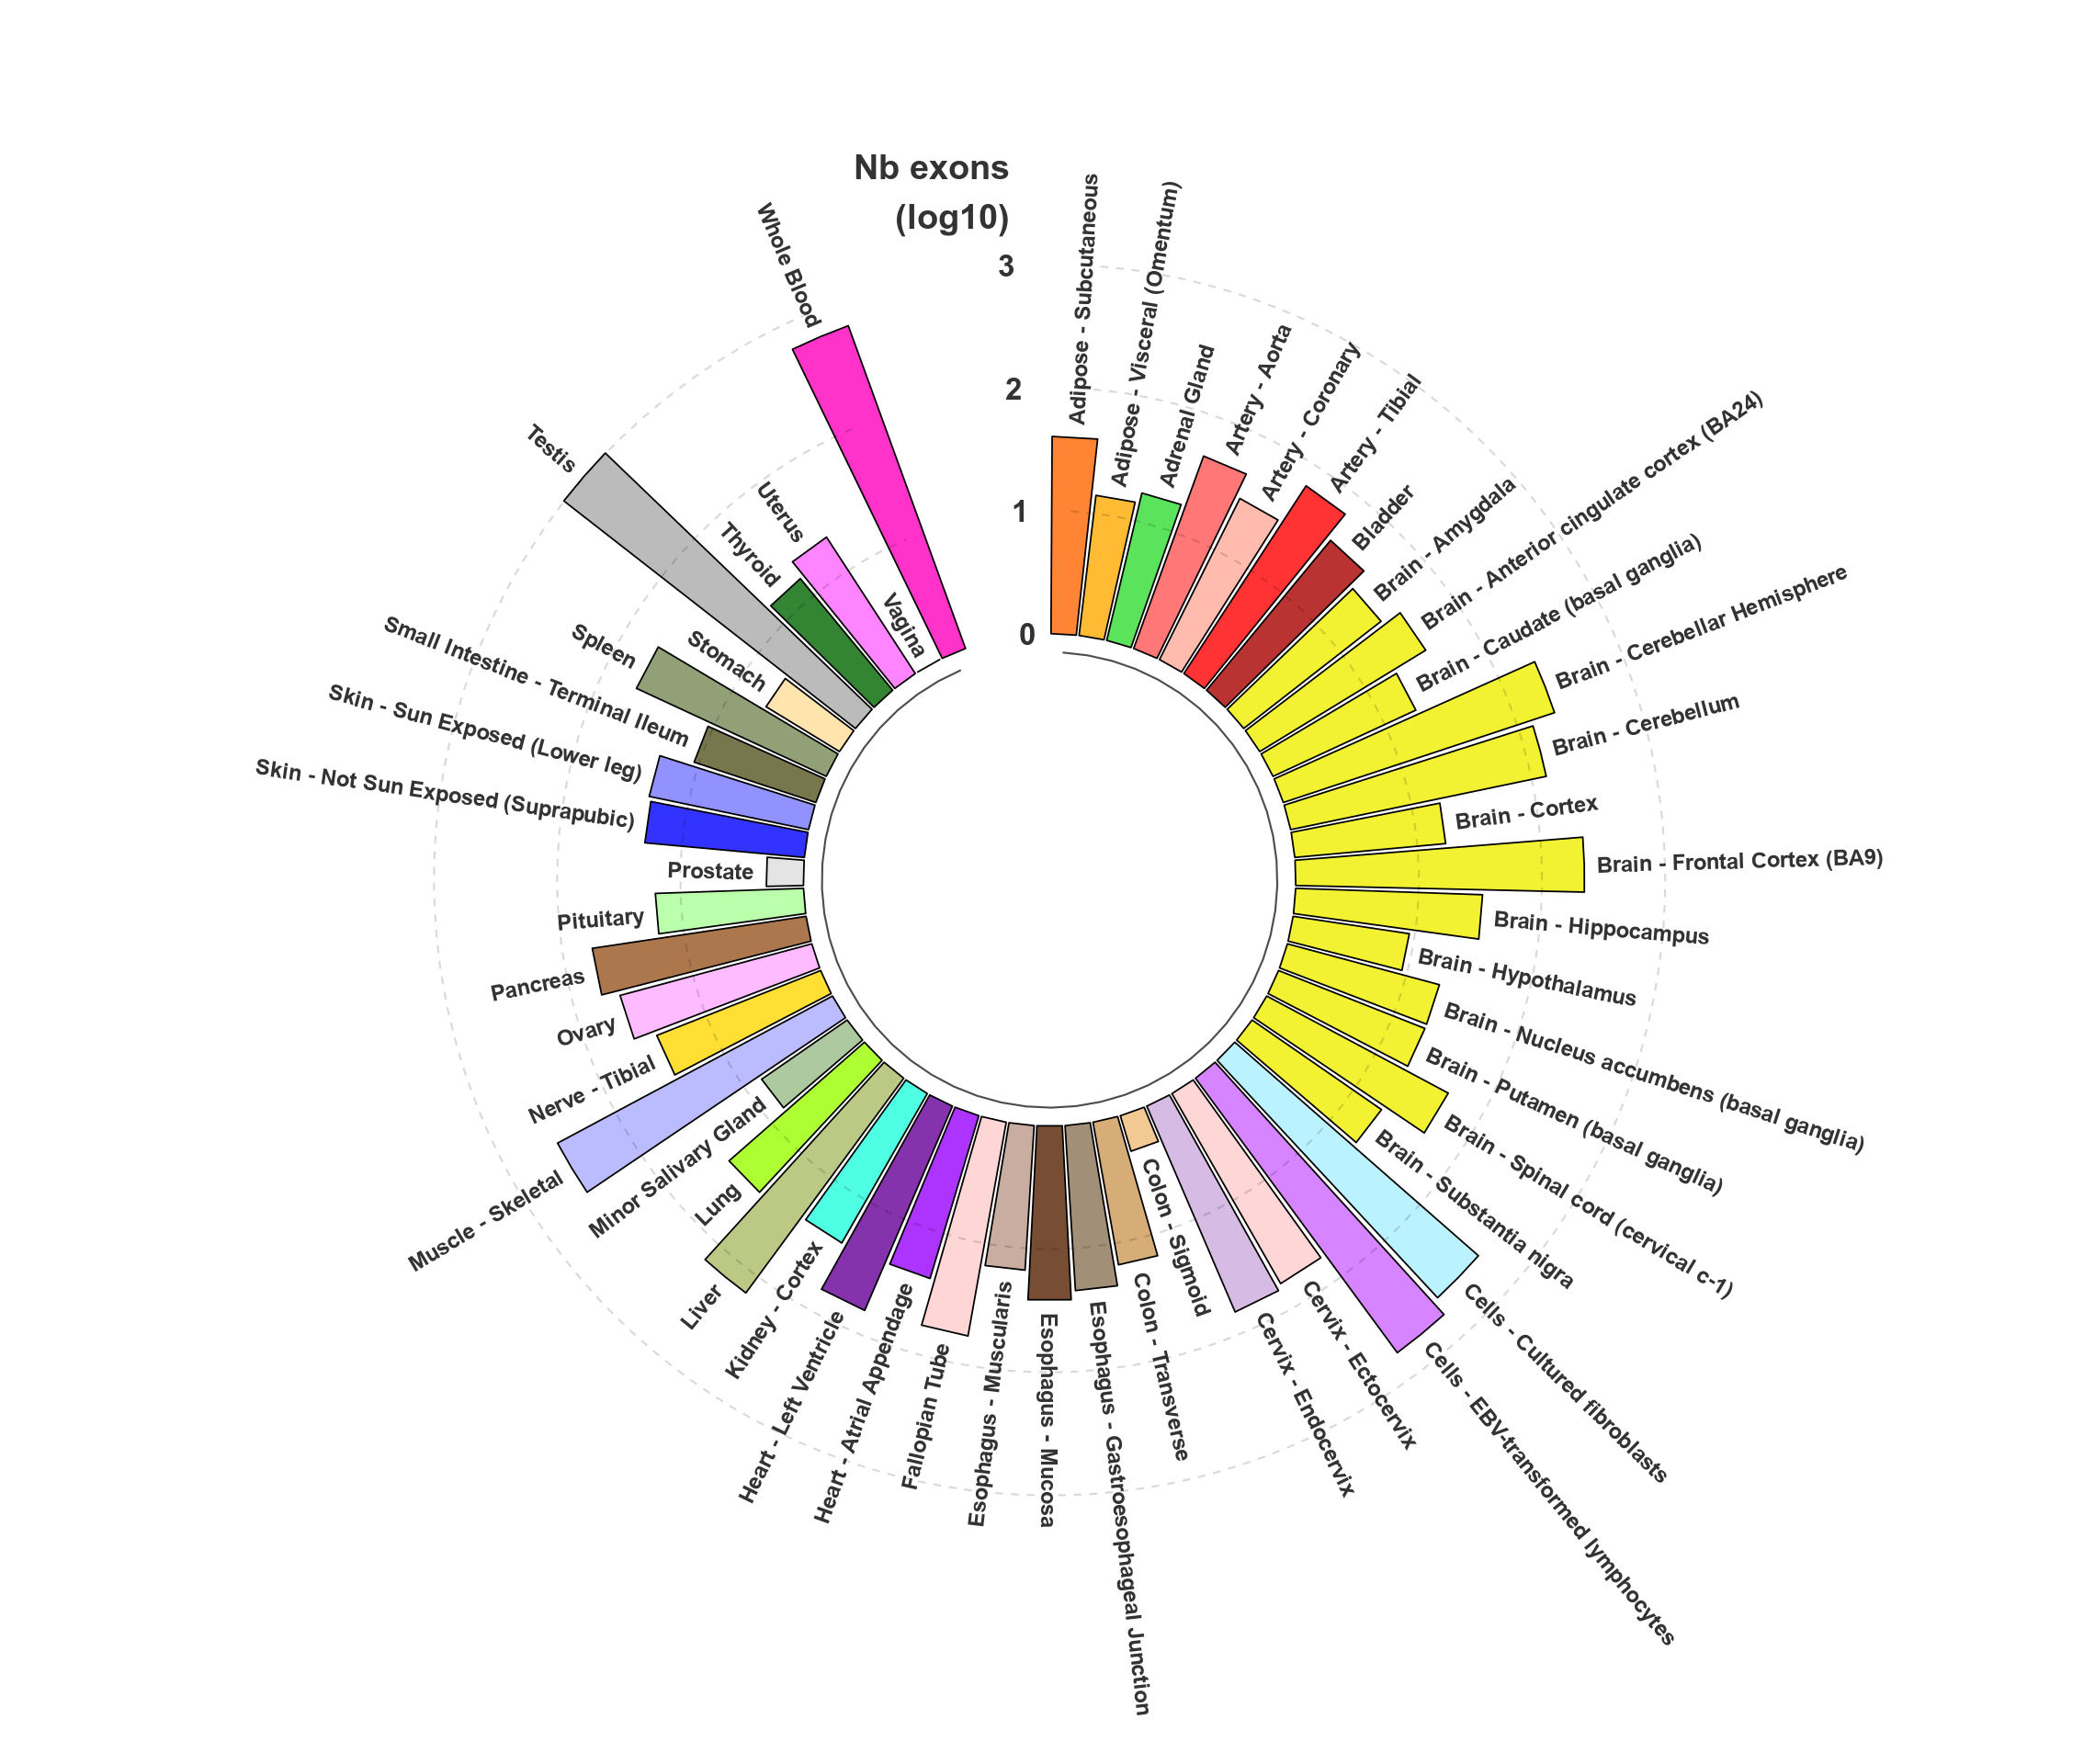

In [6]:
# Loading


# xlsx files
data <- read_excel("/gstock/EXOTIC/data/EXOTIC/exotic_sun_tissues.xlsx")
data
length(unique(data$Tissue))
options(repr.plot.width=19, repr.plot.height=16)

# colors
 
 
# Set a number of 'empty bar' to add at the end of each group
empty_bar <- 3
to_add <- data.frame( matrix(NA, empty_bar*length(unique(data$group)), ncol(data)) )
colnames(to_add) <- colnames(data)
to_add$group <- rep(unique(data$group), each=empty_bar)
data <- rbind(data, to_add)
data <- data %>% arrange(group)
data$id <- seq(1, nrow(data))
 
# Get the name and the y position of each label
label_data <- data
number_of_bar <- nrow(label_data)
angle <- 90 - 360 * (label_data$id-0.5) /number_of_bar     # I substract 0.5 because the letter must have the angle of the center of the bars. Not extreme right(1) or extreme left (0)
label_data$hjust <- ifelse( angle < -90, 1, 0)
label_data$angle <- ifelse(angle < -90, angle+180, angle)
 
# prepare a data frame for base lines
base_data <- data %>% 
  group_by(group) %>% 
  summarize(start=min(id), end=max(id) - empty_bar) %>% 
  rowwise() %>% 
  mutate(title=mean(c(start, end)))
 
# prepare a data frame for grid (scales)
grid_data <- base_data
grid_data$end <- grid_data$end[ c( nrow(grid_data), 1:nrow(grid_data)-1)] + 1
grid_data$start <- grid_data$start - 1
grid_data <- grid_data[-1,]
 



# Make the plot
p <- ggplot(data, aes(x=as.factor(id), y=log_value)) +     # Note that id is a factor. If x is numeric, there is some space between the first bar
  
  geom_bar(aes(x=as.factor(id), y=log_value, fill=Tissue), stat="identity",  colour='black', alpha=0.8)  + scale_fill_manual(values=data$Color) + 
   
  # Add a val=100/75/50/25 lines. I do it at the beginning to make sur barplots are OVER it.
#   geom_segment(data=grid_data, aes(x = end, y = 4, xend = start, yend = 4), colour = "grey", alpha=1, size=0.3 , inherit.aes = FALSE ) +
#   geom_segment(data=grid_data, aes(x = end, y = 3, xend = start, yend = 3), colour = "grey", alpha=1, size=0.3 , inherit.aes = FALSE ) +
#   geom_segment(data=grid_data, aes(x = end, y = 2, xend = start, yend = 2), colour = "grey", alpha=1, size=0.3 , inherit.aes = FALSE ) +
#   geom_segment(data=grid_data, aes(x = end, y = 1, xend = start, yend = 1), colour = "grey", alpha=1, size=0.3 , inherit.aes = FALSE ) +
#   geom_segment(data=grid_data, aes(x = end, y = 0, xend = start, yend = 0), colour = "grey", alpha=1, size=0.3 , inherit.aes = FALSE ) +

  # Add text showing the value of each 100/75/50/25 lines
  annotate("text", x = rep(max(data$id),4), y = c(0, 1, 2, 3), label = c("0", "1", "2", "3") , color="black", alpha=0.8, size=7 , angle=0, fontface="bold", hjust=1)  +
  annotate("text", x = rep(max(data$id),1), y = c(3.6), label = c("Nb exons\n(log10)") , color="black", alpha=0.8, size=8 , angle=0, fontface="bold", hjust=1)  +
  
  ylim(-2,4) +
  theme_minimal() +
  theme(
    legend.position = "none",
    axis.text = element_blank(),
    axis.title = element_blank(),
    panel.grid = element_blank(),
    plot.margin = unit(rep(-1,4), "cm") 
  ) +
  coord_polar() +
  geom_text(data=label_data, aes(x=id, y=log_value+0.1, label=Tissue, hjust=hjust), color="black", fontface="bold",alpha=0.8, size=5, angle= label_data$angle, inherit.aes = FALSE ) +
  
#   # Add base line information
    geom_segment(data=base_data, aes(x = start, y = 0 - 0.15, xend = end, yend = 0-0.15), colour = "black", alpha=0.7, size=0.6 , inherit.aes = FALSE)  +
    geom_segment(data=base_data, aes(x = start, y = 1, xend = end, yend = 1), colour = "black", alpha=0.15, size=0.6 , inherit.aes = FALSE , linetype=2 )  +
    geom_segment(data=base_data, aes(x = start, y = 2, xend = end, yend = 2), colour = "black", alpha=0.15, size=0.6 , inherit.aes = FALSE  , linetype=2) + 
geom_segment(data=base_data, aes(x = start, y = 3, xend = end, yend = 3), colour = "black", alpha=0.15, size=0.6 , inherit.aes = FALSE , linetype=2 )  
# jpeg("/gstock/EXOTIC/clean/FIGURES/1_circular_barplot.jpg", width = 7000, height = 5000, res=300)

#   geom_text(data=base_data, aes(x = 4, y = 3, label=group), hjust=c(1,1,0,0), colour = "black", alpha=0.8, size=5, fontface="bold", inherit.aes = FALSE)
# base_data
p
# dev.off()